# **Obesity Level Risk Prediction**
---

## **Importing Data**

In [19]:
# dataframe handling
import numpy as np
import pandas as pd

# warning handling
import warnings

# importing os library
import os

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# boosting algorithm
import xgboost as xgb

# metrics and accuracy scores
from sklearn.metrics import accuracy_score, classification_report

# disabling warnings
warnings.filterwarnings("ignore")

In [20]:
# reading the source file
df = pd.read_csv('obesity_data.csv')

In [21]:
# viewing data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## **Viewing Data**

In [22]:
df.shape

(2111, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [24]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## **Data Cleaning and Preprocessing**

In [25]:
df = df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']]
df.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II


In [26]:
# renaming columns
df.columns = ['Gender', 'FHO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Class']
df.head()

,Gender,FHO,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Class
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II


In [27]:
cat_cols = ['Gender', 'FHO', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Class']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### **Encoding Categorical Columns**

In [28]:
# encoding labels
label_encoder = LabelEncoder()

for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])
        
df.head()

,Gender,FHO,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Class
0,0,1,0,2,0,0,3,3,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1
1,0,1,0,2,1,1,2,3,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1
2,1,1,0,2,0,0,1,3,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1
3,1,0,0,2,0,0,1,4,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5
4,1,0,0,2,0,0,2,3,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6


### **Standardizing Numerical Columns**

In [29]:
# initialize the standard scaler
scaler = StandardScaler()

# apply the standard scaler to each column individually
for column in num_cols:
    # reshape the column to a 2D array
    df[column] = scaler.fit_transform(df[[column]])

# display the first few rows of the dataframe
df.head()

,Gender,FHO,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Class
0,0,1,0,2,0,0,3,3,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1
1,0,1,0,2,1,1,2,3,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,1
2,1,1,0,2,0,0,1,3,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1
3,1,0,0,2,0,0,1,4,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,5
4,1,0,0,2,0,0,2,3,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,6


### **Splitting data into test and train**

In [30]:
X = df.drop('Class', axis = 1)
y = df["Class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Machine Learning**
---

### **1. Logistic Regression**

In [31]:
# training model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# making classifications
lr_y_pred = lr_model.predict(X_test)

# checking score
LR = accuracy_score(y_test, lr_y_pred)

# printing Classification Report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        56
           1       0.91      0.63      0.74        62
           2       0.95      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.79      0.79      0.79        56
           6       0.77      0.86      0.81        50

    accuracy                           0.88       423
   macro avg       0.87      0.88      0.87       423
weighted avg       0.88      0.88      0.87       423



- **Logistic Regression with Hyperparametric Tuning**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create an instance of the Logistic Regression model
lr_model = LogisticRegression()

# Create Grid Search CV instance
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv = 5, scoring='accuracy', verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for prediction
best_lr_model = grid_search.best_estimator_
lr_y_pred = best_lr_model.predict(X_test)

# Check the accuracy
LR = accuracy_score(y_test, lr_y_pred)

# Print Classification Report
print(classification_report(y_test, lr_y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.9378066124699315
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.98      0.82      0.89        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.85      0.89      0.87        56
           6       0.90      0.94      0.92        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### **2. Support Vector Machine**

In [33]:
# creating an instance of SVM class
svm_model = SVC()
svm_model.fit(X_train, y_train)

# maing predictions
svm_y_pred = svm_model.predict(X_test)

# checking score
SVM = accuracy_score(y_test, svm_y_pred)

# printing Classification Report
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.86      0.81      0.83        62
           2       0.96      0.91      0.93        78
           3       0.90      0.98      0.94        58
           4       1.00      1.00      1.00        63
           5       0.79      0.86      0.82        56
           6       0.91      0.82      0.86        50

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423



- **SVC with Hyperparametric Tuning**

In [34]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient
    'kernel': ['linear', 'rbf'],  # Kernel type
    'degree': [2, 3],  # Degree of the polynomial kernel
    'coef0': [0.0, 0.1]  # Independent term in the polynomial kernel equation
}

# Create an instance of the SVC model
svm_model = SVC()

# Create Grid Search CV instance
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for prediction
best_svm_model = grid_search.best_estimator_
svm_y_pred = best_svm_model.predict(X_test)

# Check the accuracy
SVM = accuracy_score(y_test, svm_y_pred)

# Print Classification Report
print(classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9543939739785439
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.97      0.98        62
           2       0.99      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.98      0.96      0.97        56
           6       0.96      0.96      0.96        50

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



- **SVC with Bagging Classifier**

In [36]:
# Creating an instance of the BaggingClassifier with SVM as the base estimator
bagged_svm_model = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)

# Training the bagged SVM model
bagged_svm_model.fit(X_train, y_train)

# Making predictions
bagged_svm_y_pred = bagged_svm_model.predict(X_test)

# Checking score
bagged_svm_accuracy = accuracy_score(y_test, bagged_svm_y_pred)

# Printing Classification Report
print("Bagged SVM Accuracy:", bagged_svm_accuracy)
print(classification_report(y_test, bagged_svm_y_pred))

Bagged SVM Accuracy: 0.9078014184397163
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.84      0.79      0.82        62
           2       0.96      0.92      0.94        78
           3       0.92      0.98      0.95        58
           4       1.00      1.00      1.00        63
           5       0.81      0.82      0.81        56
           6       0.88      0.84      0.86        50

    accuracy                           0.91       423
   macro avg       0.90      0.91      0.90       423
weighted avg       0.91      0.91      0.91       423



### **3. K-Nearest Neighbours**

In [37]:
# building a function to test best neighbour 
def KNN(k):
    # building a KNN model (default k=5)
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # fitting the model to the training data
    knn_model.fit(X_train, y_train)

    # making predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    # evaluating the model's accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    return accuracy_knn

# finding the best n value
k_values = [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

best_accuracy = 0
best_k = None

for k in k_values:
    accuracy = KNN(k)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best Accuracy: {0:0.5f} for K = {1}".format(best_accuracy, best_k))

KNN = best_accuracy

Best Accuracy: 0.83452 for K = 3


- **KNN with Hyperparameter Tuning**

In [38]:
def knn_hyperparameter_tuning(X_train, X_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
        'n_neighbors': [3, 4, 5, 6, 7],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'algorithm': ['auto', 'ball_tree'],  # Algorithm used to compute the nearest neighbors
        'p': [1, 2],  # Power parameter for the Minkowski metric
        'leaf_size': [10, 20, 30],  # Leaf size passed to BallTree or KDTree
    }

    # Create an instance of the KNN model
    knn_model = KNeighborsClassifier()

    # Create Grid Search CV instance
    grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

    # Fit the Grid Search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and best score
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # Use the best model for prediction
    best_knn_model = grid_search.best_estimator_
    knn_y_pred = best_knn_model.predict(X_test)

    # Check the accuracy
    knn_accuracy = accuracy_score(y_test, knn_y_pred)

    # Print Classification Report
    print(classification_report(y_test, knn_y_pred))

    return best_knn_model, knn_y_pred, knn_accuracy

# Assuming X_train, X_test, y_train, y_test are already defined
best_knn_model, knn_y_pred, knn_accuracy = knn_hyperparameter_tuning(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best Score: 0.8915948238020823
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.88      0.60      0.71        62
           2       0.90      0.95      0.93        78
           3       0.95      0.98      0.97        58
           4       0.98      1.00      0.99        63
           5       0.72      0.82      0.77        56
           6       0.86      0.86      0.86        50

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.89      0.88      0.88       423



### **4. Decision Tree Classifier**

In [39]:
# Creating an instance of Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth = 10)

# Fitting the model to the training data
dt_model.fit(X_train, y_train)

# Making predictions
dt_y_pred = dt_model.predict(X_test)

# Checking accuracy
DTC = accuracy_score(y_test, dt_y_pred)

# Printing Classification Report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.87      0.89      0.88        62
           2       0.96      0.94      0.95        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.91      0.91      0.91        56
           6       0.98      0.94      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



### **5. Decision Tree Classifier with AdaBoost**

In [40]:
# creating model class
dt_model = DecisionTreeClassifier(max_depth = 12)

# using boosting filter
dt_ada_model = AdaBoostClassifier(estimator=dt_model, n_estimators=50, learning_rate=0.75, random_state=42, algorithm = "SAMME")

# fitting model with training data
dt_ada_model.fit(X_train, y_train)

# make predictions
dt_y_pred = dt_ada_model.predict(X_test)

# getting accuracy score
DTC_ADA = accuracy_score(y_test, dt_y_pred)

# printing accuracy report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.84      0.87      0.86        62
           2       0.96      0.92      0.94        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.98      0.94      0.96        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



### **6. Naive Baye's Classifier**

In [41]:
# Creating an instance of Gaussian Naive Bayes Classifier
nb_model = GaussianNB()

# Fitting the model to the training data
nb_model.fit(X_train, y_train)

# Making predictions
nb_y_pred = nb_model.predict(X_test)

# Checking accuracy
NB = accuracy_score(y_test, nb_y_pred)

# Printing Classification Report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        56
           1       0.68      0.34      0.45        62
           2       0.44      0.64      0.52        78
           3       0.66      0.91      0.77        58
           4       1.00      1.00      1.00        63
           5       0.49      0.30      0.37        56
           6       0.57      0.32      0.41        50

    accuracy                           0.64       423
   macro avg       0.65      0.63      0.62       423
weighted avg       0.64      0.64      0.62       423



### **7. XG Boost Classifier**

In [42]:
# Creating an instance of XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions
xgb_y_pred = xgb_model.predict(X_test)

# Checking accuracy
XGB = accuracy_score(y_test, xgb_y_pred)

# Printing Classification Report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.90      0.93        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.93      0.92        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



### **8. Bagging Classifier**

In [43]:
# creating bagging classifier model
bagging_model = BaggingClassifier()

bagging_model.fit(X_train, y_train)

bag_y_pred = bagging_model.predict(X_test)

BAG = accuracy_score(y_test, bag_y_pred)

# Printing Classification Report
print(classification_report(y_test, xgb_y_pred)) 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.90      0.93        62
           2       0.97      0.96      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.93      0.92        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



### **9. Ridge Classifier**

In [44]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

ridge_y_pred = ridge_model.predict(X_test)

RC = accuracy_score(y_test, ridge_y_pred)

# Printing Classification Report
print(classification_report(y_test, ridge_y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.68        56
           1       0.67      0.23      0.34        62
           2       0.66      0.56      0.61        78
           3       0.63      0.93      0.75        58
           4       0.80      1.00      0.89        63
           5       0.69      0.45      0.54        56
           6       0.43      0.38      0.40        50

    accuracy                           0.64       423
   macro avg       0.63      0.63      0.60       423
weighted avg       0.64      0.64      0.61       423



### **10. Gradient Boosting Classifier**

In [45]:
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.5, random_state = 42)
gbc_model.fit(X_train, y_train)

gbc_y_pred = gbc_model.predict(X_test)

GBC = accuracy_score(y_test, gbc_y_pred)

# Printing Classification Report
print(classification_report(y_test, gbc_y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.95      0.85      0.90        62
           2       0.99      0.95      0.97        78
           3       0.97      1.00      0.98        58
           4       1.00      1.00      1.00        63
           5       0.88      0.95      0.91        56
           6       1.00      0.96      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



### **11. Catboost Classifier**

In [46]:
cbc_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
cbc_model.fit(X_train, y_train)

cbc_y_pred = cbc_model.predict(X_test)

CB = accuracy_score(y_test, cbc_y_pred)

# Printing Classification Report
print(classification_report(y_test, cbc_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.95      0.85      0.90        62
           2       0.95      0.95      0.95        78
           3       0.95      0.97      0.96        58
           4       1.00      1.00      1.00        63
           5       0.84      0.93      0.88        56
           6       0.96      0.90      0.93        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



### **12. Random Forest Classifier**

In [47]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_pred = rfc_model.predict(X_test)

RFC = accuracy_score(y_test, rfc_pred)

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.85      0.94      0.89        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



### **13. Light GBM Classifier**

In [48]:
warnings.filterwarnings("ignore", category=UserWarning)

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

LGBM = accuracy_score(y_test, lgbm_pred)
print(classification_report(y_test, lgbm_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

### **14. Extra Tree Classifier**

In [49]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)

etc_pred = etc_model.predict(X_test)

ETC = accuracy_score(y_test, etc_pred)
print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.88      0.90      0.89        62
           2       0.99      0.97      0.98        78
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        63
           5       0.89      0.84      0.86        56
           6       0.89      0.94      0.91        50

    accuracy                           0.95       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



### **15. Linear Discriminant Analysis**

In [50]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

lda_pred = lda_model.predict(X_test)

LDA = accuracy_score(y_test, lda_pred)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        56
           1       0.94      0.71      0.81        62
           2       1.00      0.91      0.95        78
           3       0.92      1.00      0.96        58
           4       1.00      1.00      1.00        63
           5       0.75      0.80      0.78        56
           6       0.79      0.88      0.83        50

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.89       423
weighted avg       0.90      0.90      0.90       423



### **16. Quadratic Discriminant Analysis**

In [51]:
qda_model = LinearDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

qda_pred = qda_model.predict(X_test)

QDA = accuracy_score(y_test, qda_pred)
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        56
           1       0.94      0.71      0.81        62
           2       1.00      0.91      0.95        78
           3       0.92      1.00      0.96        58
           4       1.00      1.00      1.00        63
           5       0.75      0.80      0.78        56
           6       0.79      0.88      0.83        50

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.89       423
weighted avg       0.90      0.90      0.90       423



# **ML Summary**
---

In [52]:
# summarizing all ML Model accuracies
accuracy = {"LR" : LR, "SVM" : SVM, "KNN" : KNN, "DTC" : DTC, "ADA" : DTC_ADA, "NB" : NB, "XGB" : XGB, "BAG" : BAG, "RC" : RC, "GBC" : GBC, "CB" : CB, "RFC" : RFC, "LGBM" : LGBM, "ETC" : ETC, "LDA" : LDA, "QDA" : QDA}

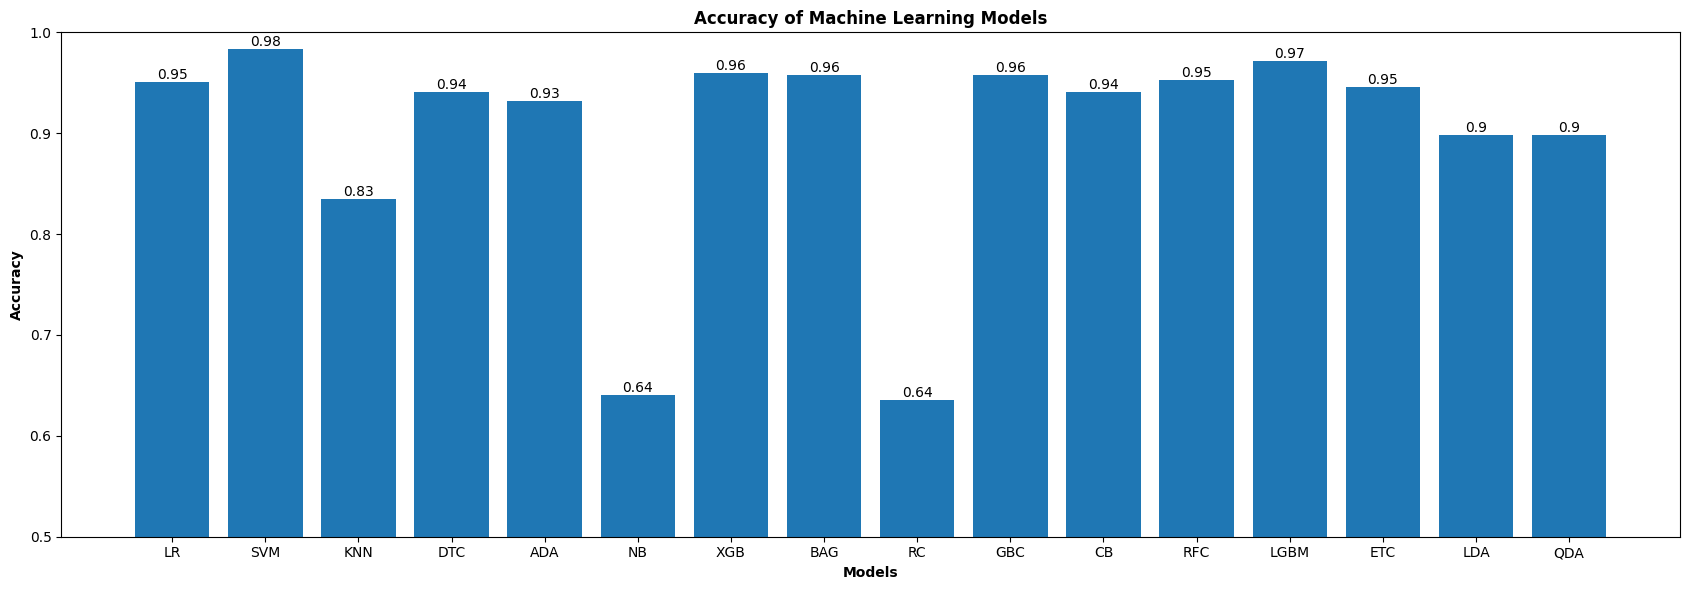

In [53]:
# Plotting accuracy scores
plt.figure(figsize=(17, 6))
bars = plt.bar(accuracy.keys(), accuracy.values())

# Adding annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel('Models', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.title('Accuracy of Machine Learning Models', fontweight = 'bold')
plt.tight_layout()
plt.ylim(0.5, 1)
plt.show()

`CONCLUSION:` **SVM** Classifier has performed the best, with a accuracy score of 98%.

---
# **THANK YOU**
---